In [ ]:
# !pip install tensorflow-macos

In [13]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import accuracy_score, confusion_matrix

%config InlineBackend.figure_format='retina'

In [10]:
(trainX, y_train), (testX, y_test) = mnist.load_data()

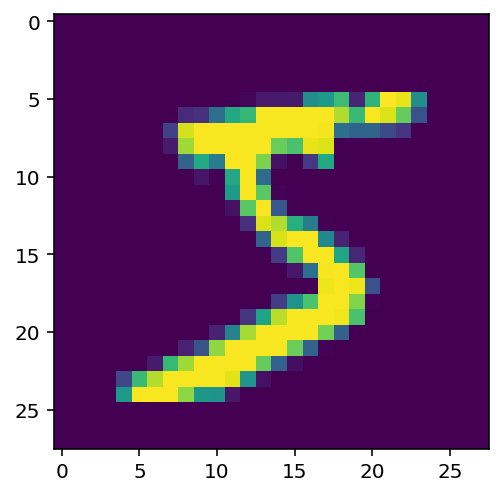

In [11]:
plt.imshow(trainX[0])

In [14]:
X_train = trainX.reshape(60000,28*28)
X_test = testX.reshape(10000,28*28)
X_train.shape, X_test.shape

## Scale the values before doing PCA
s = StandardScaler()
X_train_std = s.fit_transform(X_train)
X_test_std = s.transform(X_test)

## Run a PCA on the standardized values
pca_proc = PCA(n_components=30)
pca_proc.fit(X_train_std)

PCA(n_components=30)

In [15]:
# Transform the data - after this we have 30 PCA features to use in our Random Forest model
X_train_pca = pca_proc.transform(X_train_std)
X_test_pca = pca_proc.transform(X_test_std)
X_train_pca = pd.DataFrame(X_train_pca)
X_train_pca.columns = ['pca_vec_'+str(j) for j in range(X_train_pca.shape[1])]
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.columns = ['pca_vec_'+str(j) for j in range(X_test_pca.shape[1])]

In [16]:
rf1 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf1.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [17]:
test_probs = rf1.predict_proba(X_test_pca)
hard_preds = np.argmax(test_probs, axis=1)

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

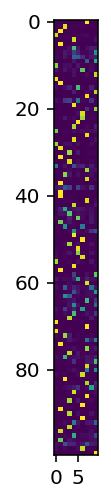

In [33]:
plt.imshow(test_probs[0:100, :])

In [20]:
log_loss(y_test, test_probs), accuracy_score(y_test, hard_preds)


(0.30544425290491944, 0.942)

In [22]:
import ml_insights as mli

In [42]:
X_train_pca

,pca_vec_0,pca_vec_1,pca_vec_2,pca_vec_3,pca_vec_4,pca_vec_5,pca_vec_6,pca_vec_7,pca_vec_8,pca_vec_9,...,pca_vec_20,pca_vec_21,pca_vec_22,pca_vec_23,pca_vec_24,pca_vec_25,pca_vec_26,pca_vec_27,pca_vec_28,pca_vec_29
0,-0.922159,-4.814790,0.067560,-8.051330,-0.985352,0.951613,0.336169,1.393355,1.051992,2.323007,...,-5.109282,1.177198,-2.324725,-2.488073,-2.695325,-3.105804,1.015458,4.915403,0.215895,-0.259061
1,8.708977,-7.754403,-3.447910,-1.668321,0.834793,-5.144664,-0.272268,3.135463,0.198327,-1.196504,...,-3.677947,-1.610431,2.466455,0.288347,-1.837492,-0.002183,-1.712562,-0.112047,-0.344678,0.379689
2,2.328389,9.431338,-6.184115,1.725064,4.092445,2.291315,18.691525,3.992159,-2.169862,-0.151272,...,9.366610,-0.403106,-0.001457,-6.965523,-1.991039,-0.933660,2.712791,9.987896,2.552259,2.493992
3,-6.582173,-3.746318,3.690851,-0.461041,5.627324,3.461548,1.561403,-4.600437,0.624953,-2.617182,...,-1.804601,-0.264694,-1.104529,-2.063888,1.268434,0.999161,-1.311999,-0.502586,1.047919,-1.423957
4,-5.183251,3.133297,-6.277947,1.459655,-1.608842,-0.612553,-0.580039,-3.205977,-0.013139,-0.699288,...,-0.566647,0.023736,-0.680672,1.775438,-3.808369,-1.195027,-0.661917,-1.309671,-1.061500,0.222902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-2.039339,-5.119129,0.375261,-4.688221,-0.645578,2.901581,-0.222257,-3.662665,1.569473,0.040803,...,1.116621,0.147295,0.794290,-0.900115,0.197848,-0.695175,1.055646,-3.322746,-1.628383,1.782594
59996,0.607841,-6.498440,3.507305,-8.397312,-1.009537,1.240181,3.967967,0.924836,7.245196,1.088354,...,2.504079,3.294307,0.520669,0.947517,-1.914676,1.173472,-1.084322,-2.392746,-1.506593,1.600536
59997,-3.777212,-3.230564,-3.806199,-7.503987,-1.361750,-2.879074,1.697896,-2.475210,-2.734865,4.493828,...,-0.448858,-0.315453,-1.022997,-3.145393,0.452555,0.270002,1.952240,0.273572,-1.161559,-2.265347
59998,1.722369,-4.948125,0.006952,7.150956,-0.925231,-5.067435,3.642962,3.799808,-2.749875,-0.506894,...,0.417759,0.137694,-2.842223,1.748413,0.616377,1.561875,1.497987,4.847610,-4.540819,1.589101


In [23]:
cv_train_preds = mli.cv_predictions(rf1, X_train_pca, y_train)

In [41]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
calib_mc = mli.SplineCalib()
calib_mc.fit(cv_train_preds, y_train, verbose=True)

Calibrating Class 0
Calibrating Class 1
Calibrating Class 2
Calibrating Class 3
Calibrating Class 4
Calibrating Class 5
Calibrating Class 6


/Users/nathanieldake/development/intuitiveml/venv/lib/python3.9/site-packages/scipy/optimize/_optimize.py:70: RuntimeWarning: overflow encountered in exp
  fg = self.fun(x, *args)


Calibrating Class 7
Calibrating Class 8
Calibrating Class 9


In [ ]:
cv_train_preds

In [25]:
test_probs_calibrated = calib_mc.calibrate(test_probs)

In [26]:
log_loss(y_test, test_probs), log_loss(y_test, test_probs_calibrated)

(0.30544425290491944, 0.18060936344600553)

In [27]:
hard_preds_calib = np.argmax(test_probs_calibrated, axis=1)


In [28]:
accuracy_score(y_test, hard_preds), accuracy_score(y_test, hard_preds_calib)


(0.942, 0.9433)

In [29]:
test_probs_calibrated

array([[4.64158137e-10, 8.81200762e-07, 3.19072110e-07, ...,
        9.99985947e-01, 1.29621437e-06, 1.03412577e-05],
       [9.40325802e-06, 3.12453997e-04, 9.99211607e-01, ...,
        8.15399646e-07, 2.83062180e-07, 1.90783731e-04],
       [4.64114865e-10, 9.99999663e-01, 2.39715685e-09, ...,
        8.49180853e-09, 2.03276232e-09, 2.49000576e-07],
       ...,
       [8.17988043e-08, 2.40994719e-05, 2.89771963e-07, ...,
        5.96535837e-04, 3.36857516e-04, 1.06303084e-01],
       [5.32718766e-05, 8.76327689e-07, 3.17307629e-07, ...,
        2.30048514e-04, 6.69942405e-03, 3.16748220e-05],
       [4.57329407e-07, 8.81187247e-07, 1.42835479e-06, ...,
        8.15480888e-07, 1.29619448e-06, 2.49019972e-07]])

In [34]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [36]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_test.reshape(-1, 1))
y_test_ohe = enc.transform(y_test.reshape(-1, 1)).toarray()

array([0., 0., 0., ..., 0., 0., 0.])

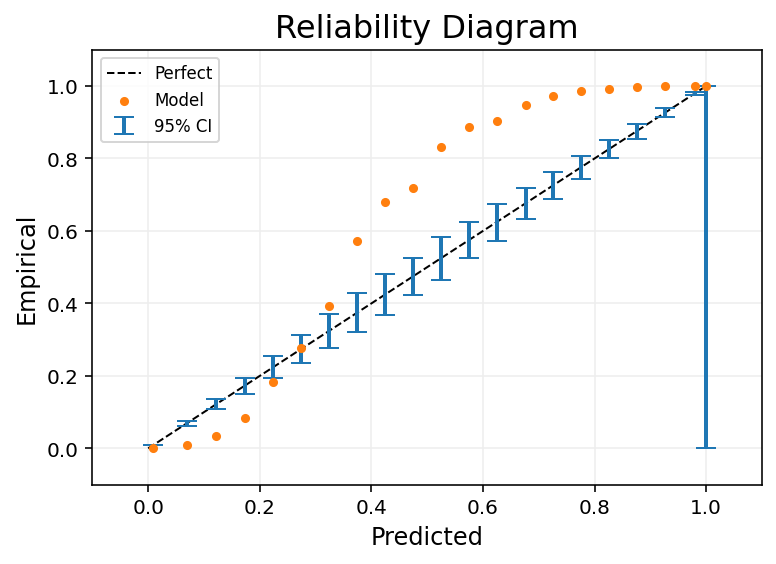

In [39]:
mli.plot_reliability_diagram(y_test_ohe.flatten(), test_probs.flatten(), marker='.');

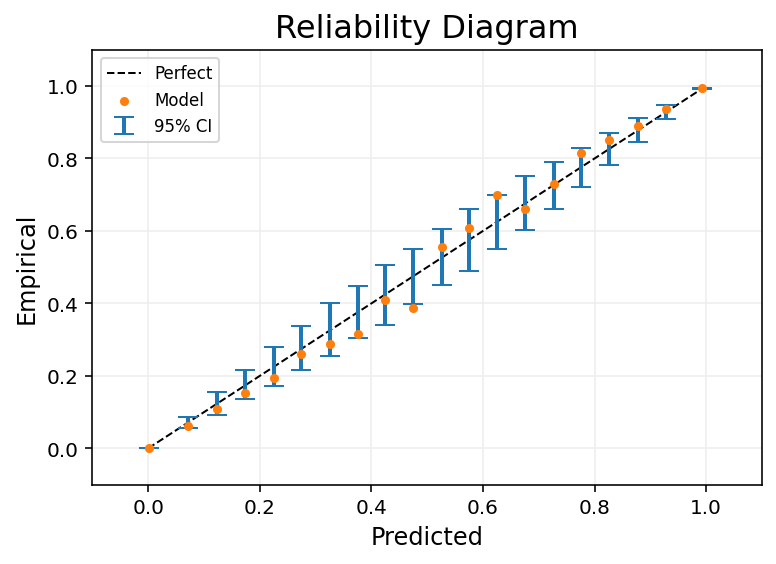

In [40]:
mli.plot_reliability_diagram(y_test_ohe.flatten(), test_probs_calibrated.flatten(), marker='.');

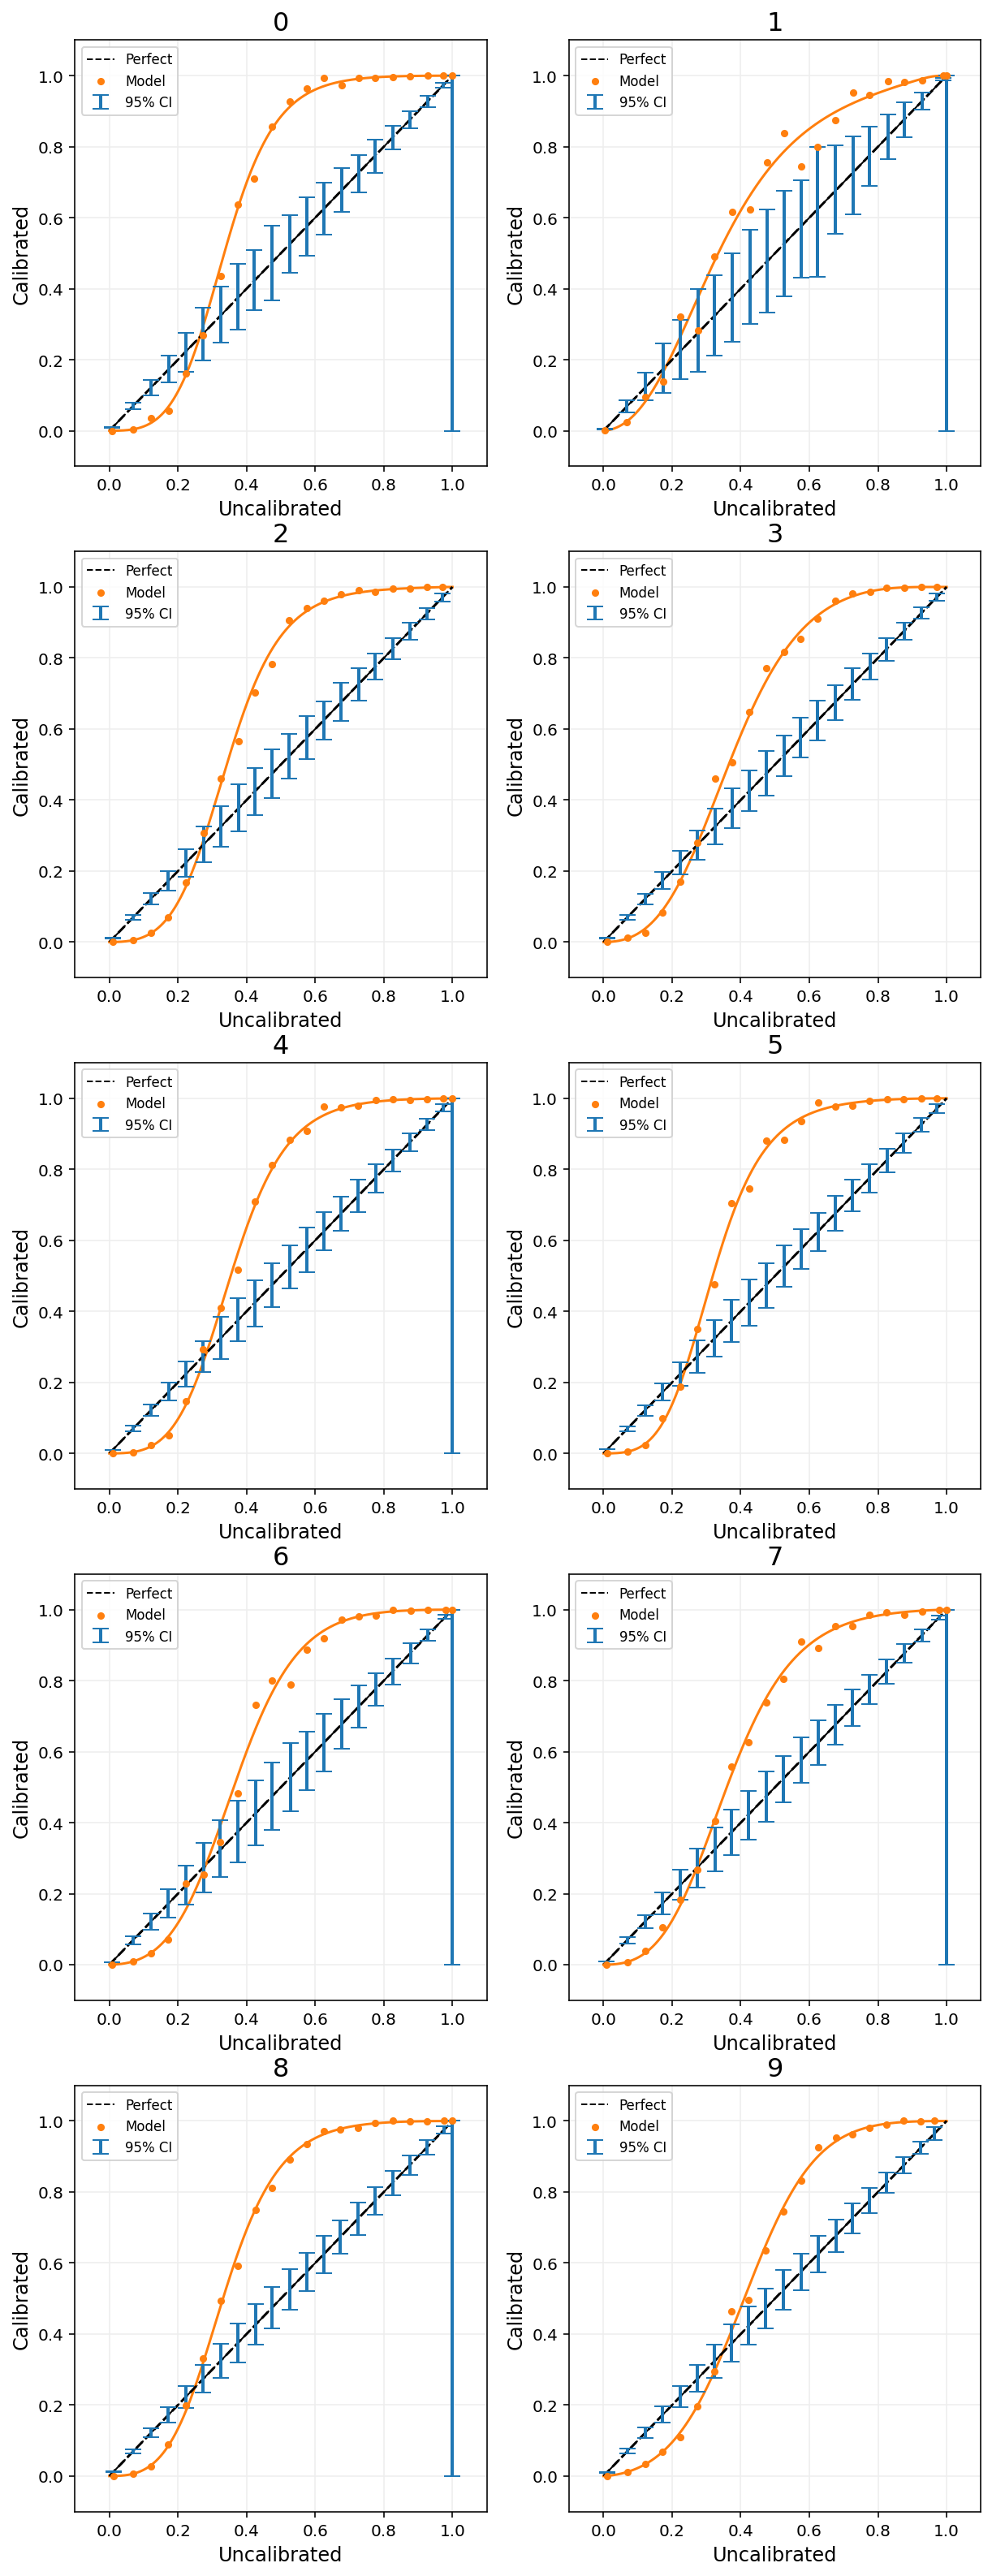

In [31]:
plt.figure(figsize=(10,28))
for i in range(10):
    plt.subplot(5,2,i+1)
    mli.plot_reliability_diagram((y_train==i).astype(int), cv_train_preds[:,i], reliability_title=i);
    calib_mc.show_calibration_curve(class_num=i)